<a href="https://colab.research.google.com/github/BaeSang1/Study/blob/main/202304/python230420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 데이터

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/2023/연세IT/kaggle/house-prices-advanced-regression-techniques (1)/"
DATA_PATH

'/content/drive/MyDrive/Colab Notebooks/2023/연세IT/kaggle/house-prices-advanced-regression-techniques (1)/'

In [4]:
# train 데이터 불러오기
import pandas as pd
train = pd.read_csv(DATA_PATH + "train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info() # 데이터 타입 / 컬럼명 확인 / 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# test 데이터 불러오기
test = pd.read_csv(DATA_PATH + "test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## 문제 확인
- 훈련 데이터 / 테스트 데이터

## Feature Engineering
- 데이터 전처리 코드 작성

### 이상치 제거
- 이상치 : 극단값, 벗어난 값, 평균으로부터 벗어난 값
- 이상한 값 : 상식에 부합하지 않는 값
- 인사 데이터 
 + 공공기관 KPI : 예산절감 / 동일한 효과
 + 급여 예측
 + 급여가 0인 데이터 <- 이상치

In [8]:
train.shape

(1460, 81)

In [9]:
train[(train['OverallQual'] < 4) & (train['SalePrice'] > 10000)]    # 데이터를 정제하기 위해 임의로 이상치 조건을 바꿔가며 진행

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
74,75,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,107400
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
323,324,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,126175
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
375,376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000
449,450,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,120000
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
620,621,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,67000
636,637,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,ConLw,Normal,60000


In [10]:
train = train.drop(train[(train['OverallQual'] < 4) & (train['SalePrice'] > 100000)].index, axis = 0)
train.shape

(1455, 81)

In [11]:
train = train.reset_index(drop = True) # 인덱스 번호를 다시 메김.
train.shape

(1455, 81)

## 종속변수의 분포 파악
- 수치 데이터 시각화 (연속형)
 + 히스토그램

181131.80137457044 79466.69935176395


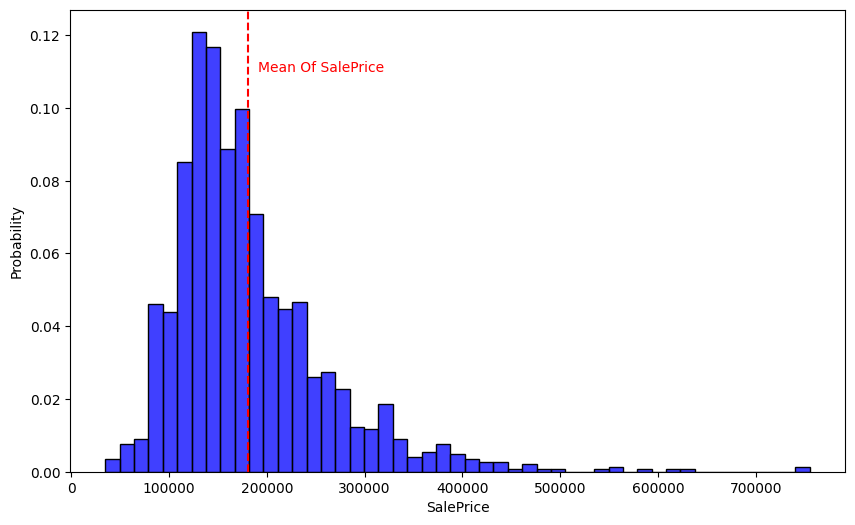

In [12]:
# Seaborn 시각화 그래프 : 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm            # 통계 모듈
(mu, sigma) = norm.fit(train['SalePrice']) 
print(mu, sigma)

fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(train['SalePrice'], color = 'b', stat = 'probability')      # probability : 확률
ax.axvline(mu, color = 'r', ls = '--')
ax.text(mu + 10000, 0.11, 'Mean Of SalePrice', color = 'r')
plt.show()

## SalePrice
- 정규화 작업 / 전통적인 모델을 활용하기 위해서
- 정규분포로 만드는 이유 : 전통적인 모델의 Assumption
 + 데이터는 정규분포여야 함
 + 샤피로 윌크스 검정

## 회귀모형
- 비선형 모델 : 결정트리, 랜덤포레스트, XGBoost, LightGBM

In [13]:
# 로그 변환
import numpy as np
train['SalePrice'] = np.log1p(train['SalePrice'])
(mu, sigma) = norm.fit(train['SalePrice']) 
print(mu, sigma)

12.025216848544066 0.3994595223123619


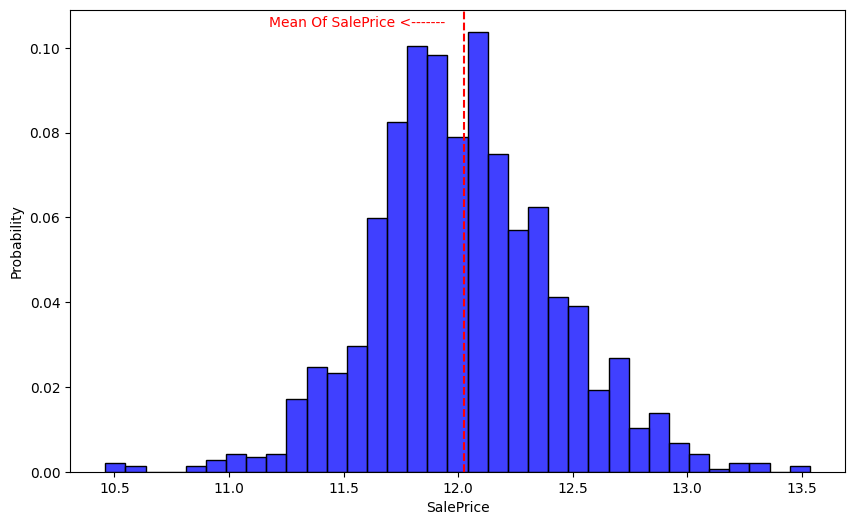

In [14]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(train['SalePrice'], color = 'b', stat = 'probability') # probability : 확률
ax.axvline(mu, color = 'r', ls = '--')
ax.text(mu - 0.85, 0.105, 'Mean Of SalePrice <-------', color = 'r')
# ax.text(mu - 0.25, 0.105, '<-----', color = 'r')
plt.show()

## 불필요한 데이터 제거
- ID 값 제거

In [15]:
train_ID = train['Id'] # train ID를 따로 저장 # 중복되는게 없어서 제거 # 패턴이 없어서 제거
test_ID = test['Id'] # test ID를 따로 저장 # 중복되는게 없어서 제거 # 패턴이 없어서 제거

train = train.drop(['Id'], axis = 1)
test = test.drop(['Id'], axis = 1)

train.shape, test.shape

((1455, 80), (1459, 79))

## Y값 추출
- y값에 해당되는 SalePrice를 추출

In [16]:
y = train['SalePrice'] # target 변수
y[:5]

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [17]:
train = train.drop('SalePrice', axis = 1)
train.shape, test.shape, y.shape

((1455, 79), (1459, 79), (1455,))

## 데이터 합치기
- 둘 다 동일하게 처리할 것이다!
 + 이 방법 쓰면, Data Leakage에 빠질 확률 높음 # 데이터 누수
- 머신러닝 데이터 분석 희망자 : Data Leakage (블로그로 잘 정리)
- 데이터 가공 및 Feature Engineering 진행 시, 평균 대체 등 진행할 때는, 원칙적으로 train / test 별도로 분리
- Data Leakage 피하는 방법 : scikit-learn pipeline을 공부할 것
(블로그로 잘 정리)
- 모의고사 정답지를 아는 상태에서 문제를 푸는 것과 동일

In [18]:
all_df = pd.concat([train, test]).reset_index(drop = True)
all_df.shape

(2914, 79)

## 결측치 확인
- 결측치의 비율을 확인하는 사용자 정의 함수 만듬
- 결측치를 제거하는 것도 패턴이 보이지 않기에 제거한다
- 결측치가 많아서 제거하는 것이 아님

In [19]:
def check_na(data, head_num = 6):
  isnull_na = (data.isnull().sum() / len(data)) * 100
  data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
  missing_data = pd.DataFrame({'Missing Ratio' :data_na, 
                               'Data Type': data.dtypes[data_na.index]})
  print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))

check_na(all_df, 20)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
PoolQC            99.656829    object
MiscFeature       96.396706    object
Alley             93.239533    object
Fence             80.439259    object
FireplaceQu       48.592999    object
LotFrontage       16.643789   float64
GarageFinish       5.456417    object
GarageQual         5.456417    object
GarageCond         5.456417    object
GarageYrBlt        5.456417   float64
GarageType         5.387783    object
BsmtExposure       2.779684    object
BsmtCond           2.779684    object
BsmtQual           2.745367    object
BsmtFinType2       2.711050    object
BsmtFinType1       2.676733    object
MasVnrType         0.823610    object
MasVnrArea         0.789293   float64
MSZoning           0.137268    object
BsmtFullBath       0.068634   float64


In [20]:
## 시각화 코드 다 쳐서, 무엇을 / 어떻게 처리할지, 판단하는 과정
## EDA : 탐색적 자료분석

In [21]:
all_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)
check_na(all_df)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageCond         5.456417    object
GarageQual         5.456417    object
GarageYrBlt        5.456417   float64
GarageFinish       5.456417    object
GarageType         5.387783    object
BsmtCond           2.779684    object


### 결측치 채우기
- 문자 데이터(object)를 채우는 방법
 + 가장 빈도가 높은 데이터 순 대치
- 수치 데이터(int, float)를 채우는 방법
 + 평균, 중간값

In [22]:
all_df['BsmtCond'].value_counts()

TA    2602
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [23]:
all_df['BsmtCond'].mode()[0]

'TA'

In [24]:
# all_df_sel = all_df.select_dtypes(['object']).columns
# all_df_sel

In [25]:
# object 컬럼만 추출
# 반복문 코드를 짠다

In [26]:
# for col in all_df_sel:
#   all_df[col] = all_df[col].mode()[0]

In [27]:
import numpy as np
# 문자열 컬럼만 추출
cat_all_vars = all_df.select_dtypes(exclude = [np.number])
cat_all_vars = list(cat_all_vars)

# 빈도수 추출 후, 결측치 추가
# fillna()
for i in cat_all_vars:
  all_df[i] = all_df[i].fillna(all_df[i].mode()[0])

In [28]:
check_na(all_df)

결측치 데이터 컬럼과 건수:
               Missing Ratio Data Type
GarageYrBlt        5.456417   float64
MasVnrArea         0.789293   float64
BsmtFullBath       0.068634   float64
BsmtHalfBath       0.068634   float64
BsmtFinSF1         0.034317   float64
BsmtFinSF2         0.034317   float64


In [29]:
# 수치 데이터 채울 수 있다.
# 평균, 중간값 / 중간값으로 한다.

# 문자열 컬럼만 추출
num_all_vars = all_df.select_dtypes(include = [np.number])
num_all_vars = list(num_all_vars)

# 빈도수 추출 후, 결측치 추가
# fillna()
for i in num_all_vars:
  all_df[i] = all_df[i].fillna(all_df[i].median())

check_na(all_df)

결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


In [30]:
check_na(all_df)

결측치 데이터 컬럼과 건수:
 Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


In [31]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2914 non-null   int64  
 1   MSZoning       2914 non-null   object 
 2   LotArea        2914 non-null   int64  
 3   Street         2914 non-null   object 
 4   LotShape       2914 non-null   object 
 5   LandContour    2914 non-null   object 
 6   Utilities      2914 non-null   object 
 7   LotConfig      2914 non-null   object 
 8   LandSlope      2914 non-null   object 
 9   Neighborhood   2914 non-null   object 
 10  Condition1     2914 non-null   object 
 11  Condition2     2914 non-null   object 
 12  BldgType       2914 non-null   object 
 13  HouseStyle     2914 non-null   object 
 14  OverallQual    2914 non-null   int64  
 15  OverallCond    2914 non-null   int64  
 16  YearBuilt      2914 non-null   int64  
 17  YearRemodAdd   2914 non-null   int64  
 18  RoofStyl

## 도출변수(파생변수, Derived Variable)
- 실무에선 몇 달을 씨름


- 성별 분류 모델
- 암첫의 사이즈, 생김새 등등
- 수컷의 크기, 무게, 높이

- 통계 vs 머신러닝
    - 통계 : 현재 상황을 진단
    - 머신러닝 : 예측

In [32]:
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']    # 파생변수 생성
all_df = all_df.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)    # 파생변수 생성에 쓰인 컬럼들 삭제
print(all_df.shape)

(2914, 71)


In [33]:
all_df['Total_Bathrooms'] = (all_df['FullBath'] + (0.5 * all_df['HalfBath']) + all_df['BsmtFullBath'] + (0.5 * all_df['BsmtHalfBath']))
all_df['Total_porch_sf'] = (all_df['OpenPorchSF'] + all_df['3SsnPorch'] + all_df['EnclosedPorch'] + all_df['ScreenPorch'])
all_df = all_df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'], axis=1)
print(all_df.shape)

(2914, 65)


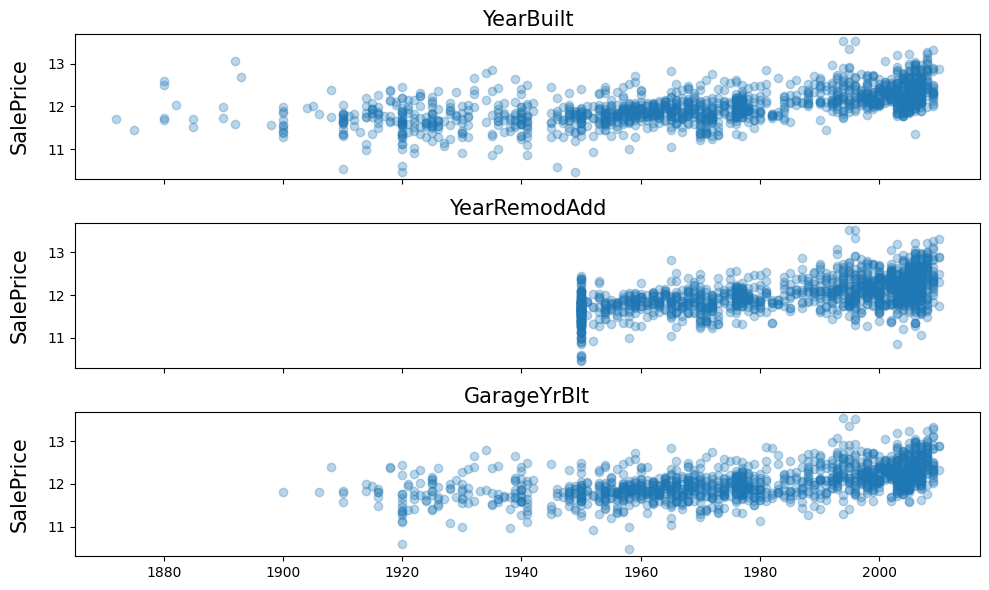

In [34]:
# year 도출 변수
year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

fig, ax = plt.subplots(3, 1, figsize = (10,6), sharex=True, sharey=True)
for i,var in enumerate(year_features):
    if var != 'YrSold':
        ax[i].scatter(train[var], y, alpha=0.3)
        ax[i].set_title(f'{var}', size = 15)
        ax[i].set_ylabel('SalePrice', size = 15, labelpad = 12.5)

plt.tight_layout()
plt.show()  # 그래프가 비슷한 양상을 보이고 있으면 모두 보여줄 필요가 없다

- 연도가 최근일수록 산점도는 우상향을 나타내고 있음을 확인

In [35]:
all_df = all_df.drop(['YearBuilt','GarageYrBlt' ], axis = 1)
all_df.shape

(2914, 63)

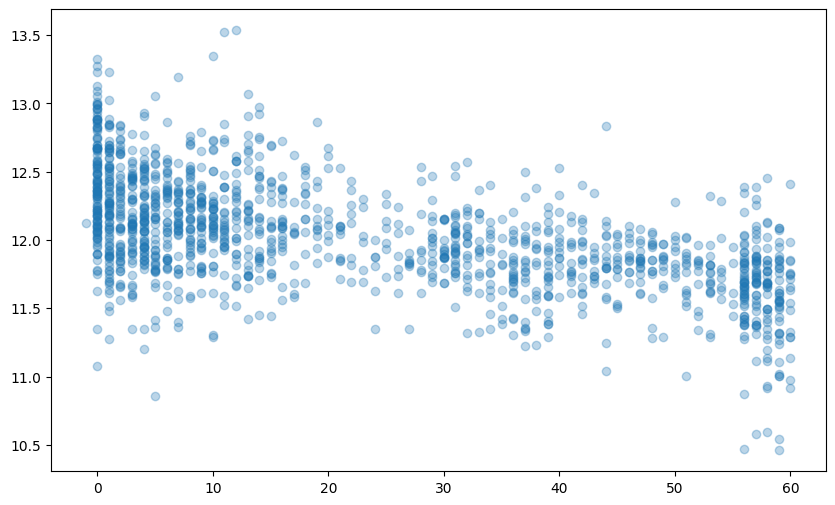

In [36]:
# YrSold : 판매된 연도
# 리모델링 연도 /  판매된 연도, 차이를 구할 수 있음

YearsSinceRemodel = train['YrSold'].astype(int) - train['YearRemodAdd'].astype(int)   # 팔린 연도 - 리모델링 연도(차이구하기)

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(YearsSinceRemodel, y, alpha=0.3)

plt.show()   # YearsSinceRemodel가 유의미한 데이터를 보이고 있음(채택함)

In [37]:
all_df['YearsSinceRemodel'] = all_df['YrSold'].astype(int) - all_df['YearRemodAdd'].astype(int)
all_df = all_df.drop(['YrSold', 'YearRemodAdd'], axis = 1)
all_df.shape

(2914, 62)

## 더미변수
- 0과 1로 변환

In [38]:
train["PoolArea"].value_counts()

0      1448
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [39]:
def count_dummy(x):
    if x > 0:
        return 1
    else:
        return 0

In [40]:
all_df['PoolArea'] = all_df['PoolArea'].apply(count_dummy)   # pandas에서 apply = 반복문의 기능을 가진 내장 메소드
all_df['PoolArea'].value_counts()

0    2901
1      13
Name: PoolArea, dtype: int64

In [41]:
all_df['GarageArea'] = all_df['GarageArea'].apply(count_dummy)
all_df['GarageArea'].value_counts()

1    2757
0     157
Name: GarageArea, dtype: int64

In [42]:
all_df['Fireplaces'].value_counts()

0    1416
1    1267
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [43]:
all_df['Fireplaces'] = all_df['Fireplaces'].apply(count_dummy)
all_df['Fireplaces'].value_counts()

1    1498
0    1416
Name: Fireplaces, dtype: int64

## 문자 데이터
- 명목형
- 서열형
     - 서열형(ex.등급제) : Label Encoding, Orinal Encoding
        - Lable = 종속변수
        - Ordinal = 독립변수
     - 명목형(ex.성별) : One-Hot Encoding

## 원핫 인코딩(One-Hot Encoding)


In [44]:
all_df.shape

(2914, 62)

In [45]:
import pandas as pd
all_df = pd.get_dummies(all_df).reset_index(drop=True)
all_df.shape

(2914, 258)

In [46]:
all_df.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706.0,0.0,150.0,0,1710,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,0.0,978.0,0.0,284.0,0,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,162.0,486.0,0.0,434.0,0,1786,...,0,0,0,1,0,0,0,0,1,0


## 머신러닝 모형 학습

In [47]:
# all_df = train + test
# train, test로 재분할

X = all_df.iloc[:len(y), :]
test = all_df.iloc[len(y):,:]
X.shape, y.shape, test.shape

((1455, 258), (1455,), (1459, 258))

- train, validation 분리

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1091, 258), (364, 258), (1091,), (364,))

## RMSE with sklearn
- RMSE 관련 함수는 존재하지 않아서, 추가로 만들었다.

In [49]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

## 교차검증
- 목적
    - 일반화된 성능 평가 != 정확도가 높다
        - 성능이 좋다고 정확도가 높은게 아님
    - 결과 왜곡을 방지하기 위해서

- 교차검증의 단점
    - 여러번 돌린다 -> 시간이 오래 걸린다
    - 중심극한정리 = 데이터가 많이 쌓여도 분포의 모형이 어느정도 잡히면 크게 변하지 않는다
- 층화추출 (데이터분석가 희망자)
    - 블로그로 정리 (개념+용어+메소드+샘플코드)
    - 갤럽 여론조사(https://www.gallup.co.kr/) 에서 참고

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

def cv_rmse(model, n_folds=5):
    cv = KFold(n_splits=n_folds, random_state=42, shuffle=True)
    rmse_list = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv))
    print('CV RMSE value list:', np.round(rmse_list, 4))
    print('CV RMSE mean value:', np.round(np.mean(rmse_list), 4))
    return (rmse_list)

n_folds = 5
rmse_scores = {}
lr_model = LinearRegression()

In [51]:
score = cv_rmse(lr_model, n_folds)
print("linear regression - mean: {:.4f} (std: {:.4f})".format(score.mean(), score.std()))
rmse_scores['linear regression'] = (score.mean(), score.std())

CV RMSE value list: [1.18800000e-01 1.15800000e-01 3.31655720e+03 1.17661993e+04
 9.46703000e+01]
CV RMSE mean value: 3035.5323
linear regression - mean: 3035.5323 (std: 4547.0799)


In [52]:
from sklearn.model_selection import cross_val_predict

X = all_df.iloc[:len(y), :]
X_test = all_df.iloc[len(y):, :]
X.shape, y.shape, X_test.shape

lr_model_fit = lr_model.fit(X, y)
final_preds = np.floor(np.expm1(lr_model_fit.predict(X_test)))   # np.expm1 = 앞서 로그변환 한 값들을 지수변환하는 함수
print(final_preds)

[114251. 156684. 182964. ... 168413. 111736. 220629.]


In [53]:
submission = pd.read_csv(DATA_PATH + "sample_submission.csv")
submission.iloc[:,1] = final_preds
print(submission.head())
submission.to_csv("The_first_regression.csv", index=False)

     Id  SalePrice
0  1461   114251.0
1  1462   156684.0
2  1463   182964.0
3  1464   198889.0
4  1465   195310.0


## 다른 모델 적용

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# 모델 정의
lr_model = LinearRegression()
score = cv_rmse(lr_model, n_folds)
rmse_scores['linear regression'] = (score.mean(), score.std())

# 모델 정의
rf_model = RandomForestRegressor()
score = cv_rmse(rf_model, n_folds)
rmse_scores['random Forest'] = (score.mean(), score.std())

# 모델 정의
xg_model = XGBRegressor(objective='reg:squarederror',max_depth=3,random_state = 12)
score = cv_rmse(xg_model, n_folds)
rmse_scores['xgboost'] = (score.mean(), score.std())

CV RMSE value list: [1.18800000e-01 1.15800000e-01 3.31655720e+03 1.17661993e+04
 9.46703000e+01]
CV RMSE mean value: 3035.5323
CV RMSE value list: [0.1181 0.1167 0.1312 0.1366 0.1714]
CV RMSE mean value: 0.1348


In [55]:
rmse_scores  # 모델 두개 비교 - random forest가 좋음

{'linear regression': (3035.532296182903, 4547.079919212359),
 'xgboost': (0.13480583568033508, 0.019808754678056456)}

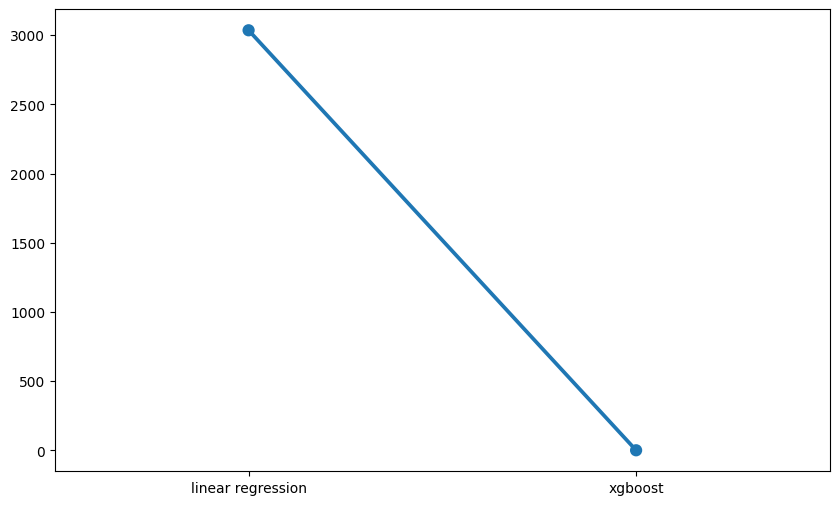

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.pointplot(x=list(rmse_scores.keys()), y=[score for score, _ in rmse_scores.values()], markers=['o'], linestyles=['-'], ax=ax)
plt.show()

In [57]:
xg_model_fit = xg_model.fit(X, y)
final_preds = np.floor(np.expm1(xg_model_fit.predict(X_test)))   # np.expm1 = 앞서 로그변환 한 값들을 지수변환하는 함수
print(final_preds)

[120293. 164629. 185702. ... 148613. 125873. 211562.]


In [58]:
# 최종적인 모델 적용한 결과 csv로 저장

submission = pd.read_csv(DATA_PATH + "sample_submission.csv")
submission.iloc[:,1] = final_preds
print(submission.head())
submission.to_csv("xgboost_regression.csv", index=False)

     Id  SalePrice
0  1461   120293.0
1  1462   164629.0
2  1463   185702.0
3  1464   195090.0
4  1465   162282.0


<ipython-input-58-266578432f6e>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  submission.iloc[:,1] = final_preds
